## 1. Data selection, reasons, and problem definition

In [3]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
pd.options.display.float_format = '{:.1f}'.format
#https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes

percent = 0.1 #샘플 비율 지정

df_audi = pd.read_csv("audi.csv")
df_audi = df_audi.sample(round(len(df_audi)*percent))
df_bmw = pd.read_csv("audi.csv")
df_bmw = df_bmw.sample(round(len(df_bmw)*percent))
df_cclass = pd.read_csv("cclass.csv")
df_cclass = df_cclass.sample(round(len(df_cclass)*percent))
df_focus = pd.read_csv("focus.csv")
df_focus = df_focus.sample(round(len(df_focus)*percent))
df_ford = pd.read_csv("ford.csv")
df_ford = df_ford.sample(round(len(df_ford)*percent))
df_hyundai = pd.read_csv("hyundai.csv")
df_hyundai = df_hyundai.sample(round(len(df_hyundai)*percent))
df_hyundai = df_hyundai.rename(columns={"tax(£)":"tax"}) #칼럼명 변경

df_merc = pd.read_csv("merc.csv")
df_merc = df_merc.sample(round(len(df_merc)*percent))
df_skoda = pd.read_csv("skoda.csv")
df_skoda = df_skoda.sample(round(len(df_skoda)*percent))
df_toyota = pd.read_csv("toyota.csv")
df_toyota = df_toyota.sample(round(len(df_toyota)*percent))
df_vauxhall = pd.read_csv("vauxhall.csv")
df_vauxhall = df_vauxhall.sample(round(len(df_vauxhall)*percent))
df_vw = pd.read_csv("vw.csv")
df_vw = df_vw.sample(round(len(df_vw)*percent))

#데이터 하나로 합치기
df_list = [df_audi, df_bmw, df_cclass, df_focus, df_ford, df_hyundai, df_merc, df_skoda, df_toyota, df_vauxhall, df_vw]
df = pd.concat(df_list, ignore_index=True)

print(df.shape)
df.sample(10)

(10843, 9)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
3839,Kuga,2015,10999,Manual,56308,Diesel,150.0,54.3,2.0
9238,Grandland X,2018,15000,Manual,17500,Petrol,145.0,55.4,1.2
1520,A4,2016,15940,Manual,57583,Diesel,30.0,62.8,2.0
4538,Fiesta,2019,15299,Manual,1758,Petrol,145.0,58.9,1.0
6655,C Class,2018,18699,Automatic,37763,Diesel,145.0,61.4,2.1
3633,Fiesta,2019,13889,Manual,8653,Petrol,145.0,58.9,1.0
6850,Fabia,2015,7790,Semi-Auto,56700,Petrol,20.0,60.1,1.2
5895,E Class,2018,34199,Semi-Auto,18331,Diesel,145.0,41.5,3.0
3529,Fiesta,2017,9500,Manual,10109,Petrol,150.0,64.2,1.1
7038,Fabia,2017,9620,Semi-Auto,24100,Petrol,20.0,60.1,1.2


In [4]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax             float64
mpg             float64
engineSize      float64
dtype: object

In [5]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10843.0,10843.0,10843.0,9908.0,9908.0,10843.0
mean,2017.1,16815.5,23287.9,119.9,54.4,1.6
std,2.1,9912.4,21214.4,64.3,13.2,0.6
min,1997.0,450.0,1.0,0.0,2.8,0.0
25%,2016.0,10250.0,7873.5,125.0,46.3,1.2
50%,2017.0,14500.0,17743.0,145.0,54.3,1.5
75%,2019.0,20500.0,32520.0,145.0,61.4,2.0
max,2020.0,154998.0,259000.0,580.0,256.8,6.2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10843 entries, 0 to 10842
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10843 non-null  object 
 1   year          10843 non-null  int64  
 2   price         10843 non-null  int64  
 3   transmission  10843 non-null  object 
 4   mileage       10843 non-null  int64  
 5   fuelType      10843 non-null  object 
 6   tax           9908 non-null   float64
 7   mpg           9908 non-null   float64
 8   engineSize    10843 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 762.5+ KB


In [7]:
#delete column"tax"
df = df.drop(["tax"], axis = 1)

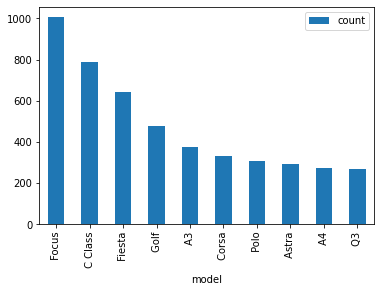

          count
model          
 Focus     1006
 C Class    788
 Fiesta     642
 Golf       477
 A3         376
 Corsa      334
 Polo       306
 Astra      293
 A4         272
 Q3         269


Index([' Focus', ' C Class', ' Fiesta', ' Golf', ' A3', ' Corsa', ' Polo',
       ' Astra', ' A4', ' Q3'],
      dtype='object', name='model')

In [8]:
#Check Trend: top10 sold out models
import matplotlib.pyplot as plt

models = pd.DataFrame(df.groupby("model")["model"].count())
models.columns = ["count"]
models.sort_values(by=["count"], inplace=True, ascending=False)
models = models.head(10)
models.plot.bar()
plt.show()
print(models)
models.index

          count  avg_price
model                     
 Focus     1006    13397.2
 C Class    788    23249.5
 Fiesta     642    10169.5
 Golf       477    16743.8
 A3         376    17436.8
 Corsa      334     8228.9
 Polo       306    11369.3
 Astra      293    10436.1
 A4         272    18904.1
 Q3         269    23431.1
15336.636134075958


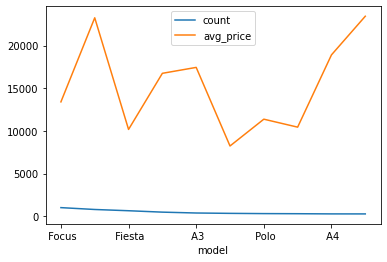

In [9]:
#top10 best selling cars avg price
models_avg_price = df.groupby("model")["price"].mean()
models_avg_price[[' Focus', ' C Class', ' Fiesta', ' Golf', ' A3', ' Corsa', ' Polo',
       ' Q3', ' Astra', ' A4']]
models['avg_price'] = models_avg_price
models.plot.line()
print(models)
print(models["avg_price"].mean())

In [10]:
#top10 best selling cars avg year
models_avg_year = df.groupby("model")["year"].mean()
models_avg_year[[' Focus', ' C Class', ' Fiesta', ' Golf', ' A3', ' Corsa', ' Polo',
       ' Q3', ' Astra', ' A4']]
models['avg_year'] = models_avg_year
print(models)
print(models["avg_year"].mean())

          count  avg_price  avg_year
model                               
 Focus     1006    13397.2    2017.1
 C Class    788    23249.5    2017.3
 Fiesta     642    10169.5    2016.7
 Golf       477    16743.8    2017.1
 A3         376    17436.8    2016.9
 Corsa      334     8228.9    2016.6
 Polo       306    11369.3    2016.9
 Astra      293    10436.1    2016.8
 A4         272    18904.1    2016.6
 Q3         269    23431.1    2017.4
2016.9377505475181


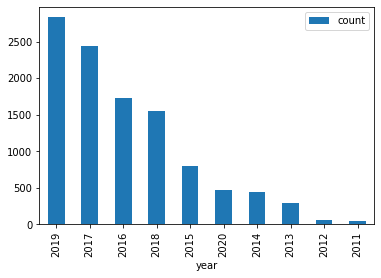

      count
year       
2019   2834
2017   2436
2016   1736
2018   1548
2015    806
2020    475
2014    440
2013    293
2012     66
2011     46


In [11]:
#Check Trend: top10 sold out years

years = pd.DataFrame(df.groupby("year")["year"].count())
years.columns = ["count"]
years.sort_values(by=["count"], inplace=True, ascending=False)
years = years.head(10)
years.plot.bar()
plt.show()
print(years)

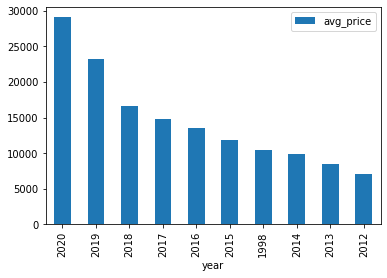

      avg_price
year           
2020    29067.5
2019    23190.1
2018    16582.6
2017    14735.7
2016    13514.1
2015    11832.4
1998    10450.0
2014     9875.8
2013     8487.2
2012     7067.5


In [12]:
#Check Trend: top10 years average price

years_price = pd.DataFrame(df.groupby("year")["price"].mean())
years_price.columns = ["avg_price"]
years_price.sort_values(by=["avg_price"], inplace=True, ascending=False)
years_price = years_price.head(10)
years_price.plot.bar()
plt.show()
print(years_price)

In [13]:
#Check how many 1970 & 1998 cars were sold

condition = (df["year"] == 1970) | (df["year"] == 1998)
df[condition]

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
6469,SL CLASS,1998,10450,Automatic,49000,Petrol,28.2,3.2


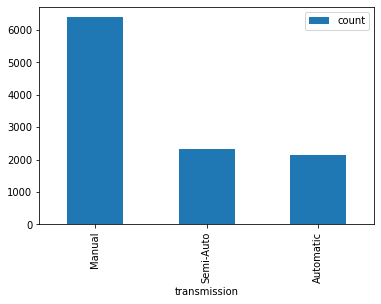

              count
transmission       
Manual         6393
Semi-Auto      2319
Automatic      2131


In [14]:
#Check transmissions
transmission = pd.DataFrame(df.groupby(["transmission"])["transmission"].count())
transmission.columns = ["count"]
transmission.sort_values(by=["count"], inplace=True, ascending=False)
transmission.plot.bar()
plt.show()
print(transmission)

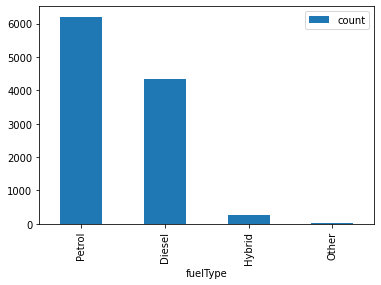

      avg_price
year           
2020    29067.5
2019    23190.1
2018    16582.6
2017    14735.7
2016    13514.1
2015    11832.4
1998    10450.0
2014     9875.8
2013     8487.2
2012     7067.5


In [15]:
#Check fuelType

fuelType = pd.DataFrame(df.groupby("fuelType")["fuelType"].count())
fuelType.columns = ["count"]
fuelType.sort_values(by=["count"], inplace=True, ascending=False)
fuelType.plot.bar()
plt.show()
print(years_price)

In [16]:
#Now we can see
#Years: 15-19 Popular
#Model: Focus / C Class / Fiesta / Golf / A3      
#Transmission: manual
#feul type: Petrol / diessel


## 2. Data preprocessing, EDA, and visualization

14

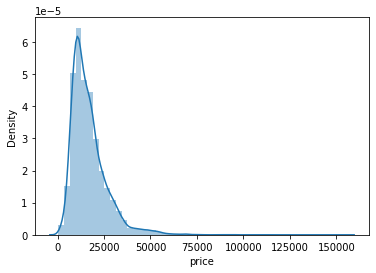

In [17]:
#Check "price" Outliers
sns.distplot(df['price'], kde=True, rug=False)
condition = (df["price"] >75000)
df[condition]["price"].count()

,model,year,price,transmission,mileage,fuelType,mpg,engineSize


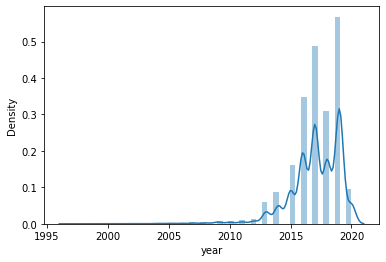

In [18]:
#Check "year" Outliers
sns.distplot(df['year'], kde=True, rug=False)
condition = (df["year"] >2020) | (df["year"] <1990)
df[condition]

6

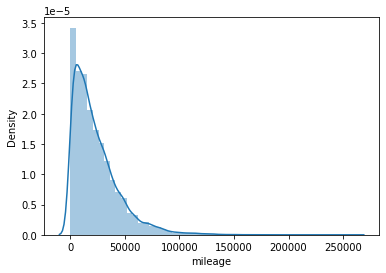

In [19]:
#Check "mileage" Outliers
sns.distplot(df['mileage'], kde=True, rug=False)
condition = (df["mileage"] >150000)
df[condition]["model"].count()

In [20]:
#Delete Outliers
df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
        (df['price'] <= np.percentile(df['price'], 99.5)) &
        (df['mileage'] >= np.percentile(df['mileage'], 0.5)) & 
        (df['mileage'] <= np.percentile(df['mileage'], 99.5)) &
        (df['year'] >= np.percentile(df['year'], 0.5)) & 
        (df['year'] <= np.percentile(df['year'], 99.5))]

In [21]:
#fill null values with average of mpg
df = df.fillna(df.mean())

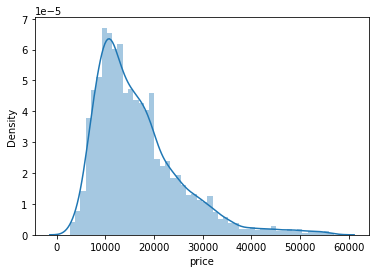

In [22]:
sns.distplot(df['price'], kde=True, rug=False)

22614.750586689195


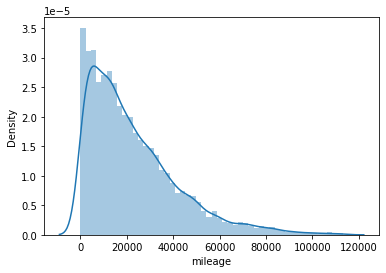

In [23]:
print(df['mileage'].mean())
sns.distplot(df['mileage'], kde=True, rug=False)

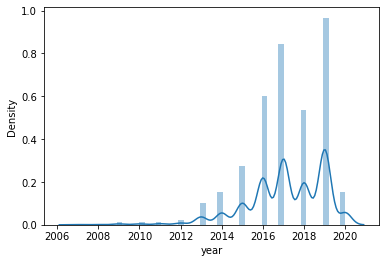

In [24]:
sns.distplot(df['year'], kde=True, rug=False)

In [25]:
# sns.distplot(df[(df['year']>2015)]['mileage'], kde=True, rug=False)

In [26]:
# sns.distplot(df[(df['year']>2009)&(df['year']<2015)]['mileage'], kde=True, rug=False)

In [27]:
# sns.distplot(df[(df['price']<=16500)]['mileage'], kde=True, rug=True)

In [28]:
# sns.distplot(df[(df['price']>16500)]['mileage'], kde=True, rug=True)

In [29]:
# sns.distplot(df[(df['price']>16500)&(df['mileage']<10000)]['year'], kde=True, rug=True)

In [30]:
# sns.distplot(df[(df['price']<=16500)]['year'], kde=True, rug=True)

## 3. Modeling and model analysis

In [31]:
## train set, validation set, test set
from sklearn.model_selection import train_test_split

X = df.drop(columns="price")
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=None)
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)

print("X_val shape: ", X_val.shape)
print("y_val shape: ", y_val.shape)

print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (5965, 7)
y_train shape:  (5965,)
X_val shape:  (2557, 7)
y_val shape:  (2557,)
X_test shape:  (2131, 7)
y_test shape:  (2131,)


#### 3-0. Baseline Model

mean:  16636.110860790388
median:  14510.0


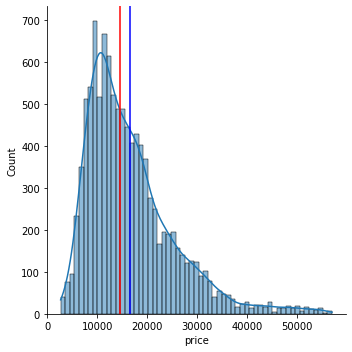

In [32]:
#Baseline Graph
price_mean = y_train.mean()

## SalePrice probability density function
sns.displot(df['price'], kde=True)

## draw mean value and median value on the graph
plt.axvline(df['price'].mean(), color='blue')
plt.axvline(df['price'].median(), color='red');
print("mean: ", df['price'].mean())
print("median: ", df['price'].median())

In [33]:
# Get baseline model error table
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score

price_mean = y_train.mean()
y_pred_baseline = [price_mean] * len(y_val)

mse = mean_squared_error(y_val, y_pred_baseline)
mae = mean_absolute_error(y_val, y_pred_baseline)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_baseline)

display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))

,Metric,Score
0,MSE,74429098.0
1,MAE,6588.8
2,RMSE,8627.2
3,R2,-0.0


#### 3-1. Multiple Linear Regression

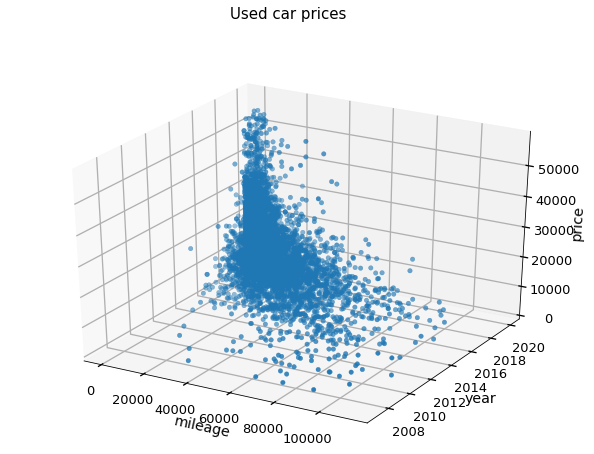

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

style.use('seaborn-talk')
fig = plt.figure()

# for 3d plot
ax = fig.gca(projection='3d')

ax.scatter(X_train['mileage'], X_train['year'], y_train)
ax.set_xlabel('mileage', labelpad=10)
ax.set_ylabel('year', labelpad=10)
ax.set_zlabel('price', labelpad=10)

plt.suptitle('Used car prices', fontsize=15)
plt.show()

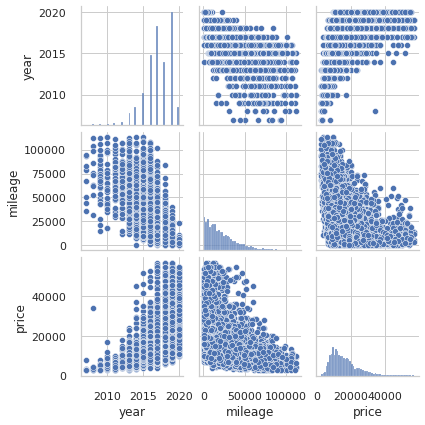

In [35]:
# Compare 3 important features: year, mileage, and price
sns.set(style='whitegrid', context='notebook')
cols = ['year', 'mileage','price']
sns.pairplot(df[cols], height=2);

In [36]:
# Make multiple_linear_model
from sklearn.linear_model import LinearRegression

multiple_linear_model = LinearRegression()

# Select features
features = ["mileage", "year"]

X_train_mlinear = X_train[features]
X_val_mlinear = X_val[features]

# fit into multiple_linear_model
multiple_linear_model.fit(X_train_mlinear, y_train)

# validation set
y_pred_val_linear = multiple_linear_model.predict(X_val_mlinear)

# 1. multiple linear regression error table
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_val, y_pred_val_linear)
mae = mean_absolute_error(y_val, y_pred_val_linear)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val_linear)

display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))

## Coefficient or parameters
b0 = multiple_linear_model.intercept_
b1, b2 = multiple_linear_model.coef_

print(f'y = {b0:.0f} + {b1:.4f}x\u2081 + {b2:.4f}x\u2082')
#"mileage" dose not matter to the slope

,Metric,Score
0,MSE,53919995.3
1,MAE,5523.4
2,RMSE,7343.0
3,R2,0.3


y = -4236274 + -0.0355x₁ + 2108.8197x₂


y = 21026.4 + -0.190x₁


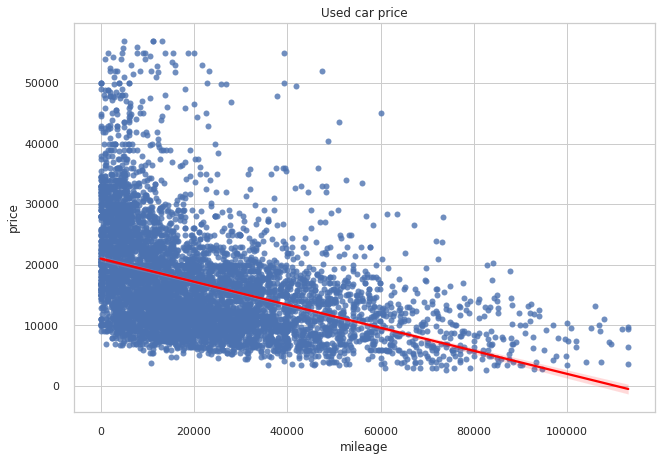

In [37]:
#Make linear regression for checking coefficient about mileage and price
import seaborn as sns
import numpy as np

linear_model = LinearRegression()
X_train_linear = X_train[["mileage"]]
linear_model.fit(X_train_linear, y_train)

## Coefficient or parameters
b0 = linear_model.intercept_
b1 = float(linear_model.coef_)

print(f'y = {b0:.1f} + {b1:.3f}x\u2081')

sns.regplot(x=X_train_linear, y=y_train, line_kws={"color": "red"}).set_title('Used car price');

In [38]:
X_train.head(3)

,model,year,transmission,mileage,fuelType,mpg,engineSize
10634,Golf,2017,Manual,27000,Diesel,60.1,2.0
8924,Viva,2016,Manual,22169,Petrol,62.8,1.0
8023,Zafira,2016,Manual,16498,Petrol,42.2,1.4


In [39]:
#categorical type checking
print("model: ",len(X_train.groupby("model")))
print("transmission: ",len(X_train.groupby("transmission")))
print("fuelType: ",len(X_train.groupby("fuelType")))

model:  141
transmission:  3
fuelType:  4


In [40]:
# ordinal encoder and standard scaler
!pip install category_encoders

# from category_encoders import OneHotEncoder
from category_encoders import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

## 원핫 인코딩
# encoder = OneHotEncoder(use_cat_names = True)
ord_enc = OrdinalEncoder(handle_missing="value")
scaler = StandardScaler()

X_train_ord_enc = ord_enc.fit_transform(X_train)
X_val_ord_enc = ord_enc.transform(X_val)
X_test_ord_enc = ord_enc.transform(X_test)

X_train_scaled = scaler.fit_transform(X_train_ord_enc)
X_val_scaled = scaler.transform(X_val_ord_enc)
X_test_scaled = scaler.transform(X_test_ord_enc)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
X_train_ord_enc.head(3)

,model,year,transmission,mileage,fuelType,mpg,engineSize
10634,1,2017,1,27000,1,60.1,2.0
8924,2,2016,1,22169,2,62.8,1.0
8023,3,2016,1,16498,2,42.2,1.4


1 features
Selected names:  Index(['engineSize'], dtype='object')
Test MAE: $5,188
Test R2: 0.38006031949486385 

2 features
Selected names:  Index(['year', 'engineSize'], dtype='object')
Test MAE: $3,616
Test R2: 0.6906169679402643 

3 features
Selected names:  Index(['year', 'transmission', 'engineSize'], dtype='object')
Test MAE: $3,439
Test R2: 0.715402133836298 

4 features
Selected names:  Index(['year', 'transmission', 'mileage', 'engineSize'], dtype='object')
Test MAE: $3,265
Test R2: 0.7377628858388301 

5 features
Selected names:  Index(['year', 'transmission', 'mileage', 'mpg', 'engineSize'], dtype='object')
Test MAE: $3,187
Test R2: 0.7427887213469709 

6 features
Selected names:  Index(['model', 'year', 'transmission', 'mileage', 'mpg', 'engineSize'], dtype='object')
Test MAE: $3,187
Test R2: 0.7427856344868062 

7 features
Selected names:  Index(['model', 'year', 'transmission', 'mileage', 'fuelType', 'mpg',
       'engineSize'],
      dtype='object')
Test MAE: $3,187
Tes

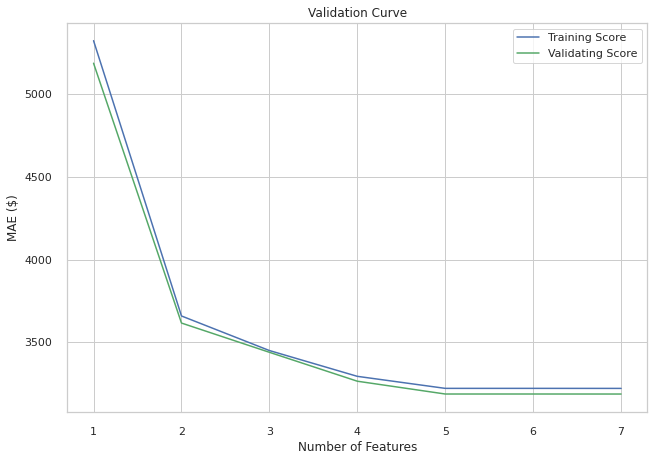

In [42]:
# features를 몇 개 선책하는 것이 좋은지 알아 봅시다.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.feature_selection import f_regression, SelectKBest

training = []
testing = []
ks = range(1, len(X_train_ord_enc.columns)+1)

# 1 부터 특성 수 만큼 사용한 모델을 만들어서 MAE 값을 비교 합니다.
for k in range(1, len(X_train_ord_enc.columns)+ 1):
    print(f'{k} features')
    
    selector = SelectKBest(score_func=f_regression, k=k)
    
    X_train_selected = selector.fit_transform(X_train_ord_enc, y_train)
    X_val_selected = selector.transform(X_val_ord_enc)
    
    all_names = X_train_ord_enc.columns
    selected_mask = selector.get_support()
    selected_names = all_names[selected_mask]
    print('Selected names: ', selected_names)
    
    model = LinearRegression()
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_train_selected)
    mae = mean_absolute_error(y_train, y_pred)
    training.append(mae)
    
    y_pred = model.predict(X_val_selected)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    testing.append(mae)
    print(f'Test MAE: ${mae:,.0f}')
    print(f'Test R2: {r2} \n')

plt.plot(ks, training, label='Training Score', color='b')
plt.plot(ks, testing, label= "Validating Score", color='g')
plt.ylabel("MAE ($)")
plt.xlabel("Number of Features")
plt.title('Validation Curve')
plt.legend()
plt.show()

In [43]:
# Tunning hyperparameters and features for Multiple_linear_model

# Select features
features = ['engineSize', 'transmission', 'year']

X_train_mlinear_new = X_train_ord_enc[features]
X_val_mlinear_new = X_val_ord_enc[features]

# fit into multiple_linear_model
multiple_linear_model.fit(X_train_mlinear_new, y_train)

# validation set
y_pred_val_mlinear_new = multiple_linear_model.predict(X_val_mlinear_new)

# 1. multiple linear regression error table
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_val, y_pred_val_mlinear_new)
mae = mean_absolute_error(y_val, y_pred_val_mlinear_new)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val_mlinear_new)

display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))

## Coefficient or parameters
b0 = multiple_linear_model.intercept_
b1, b2, b3 = multiple_linear_model.coef_

print(f'y = {b0:.0f} + {b1:.4f}x\u2081 + {b2:.4f}x\u2082 + {b3:.4f}x\u2083')
#"mileage" dose not matter to the slope

,Metric,Score
0,MSE,21164014.6
1,MAE,3439.5
2,RMSE,4600.4
3,R2,0.7


y = -4919543 + 9364.3188x₁ + 2161.6959x₂ + 2437.8499x₃


#### 3-2. Ridge Regression

Ridge Regression, alpha=0.001
Validation MAE: $3,187
Validation R2: 0.743


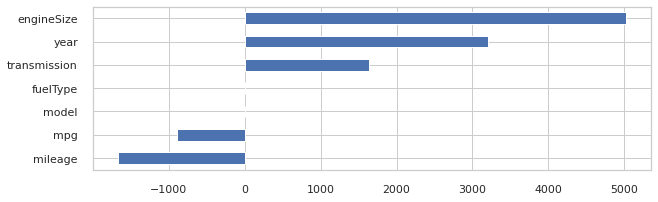

Ridge Regression, alpha=0.005
Validation MAE: $3,185
Validation R2: 0.743


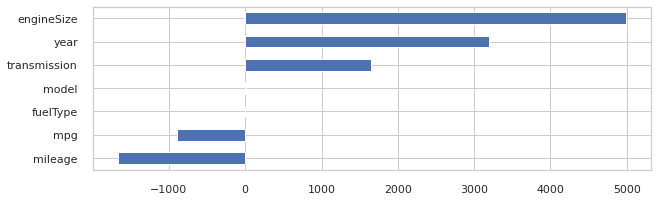

Ridge Regression, alpha=0.01
Validation MAE: $3,184
Validation R2: 0.743


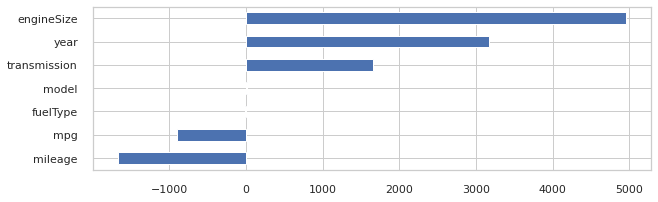

Ridge Regression, alpha=0.02
Validation MAE: $3,181
Validation R2: 0.742


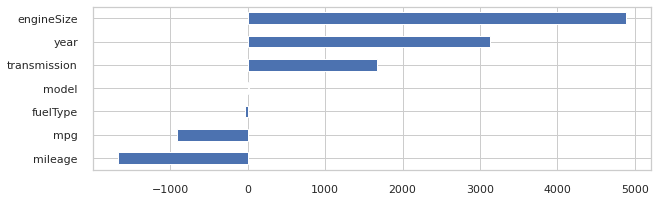

Ridge Regression, alpha=0.03
Validation MAE: $3,180
Validation R2: 0.742


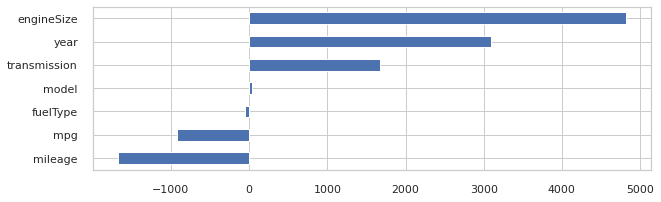

Ridge Regression, alpha=0.05
Validation MAE: $3,178
Validation R2: 0.741


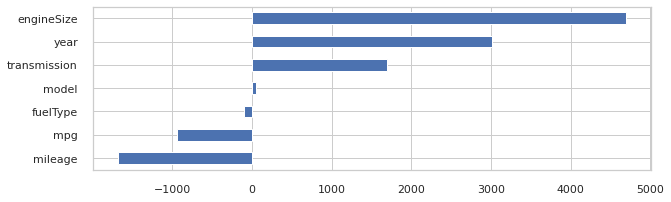

Ridge Regression, alpha=0.07
Validation MAE: $3,178
Validation R2: 0.740


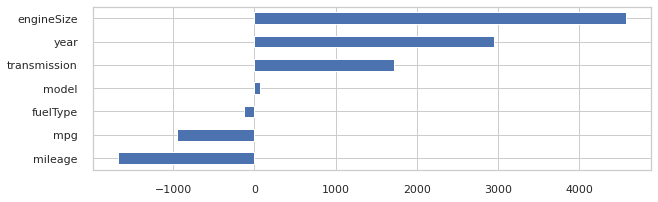

Ridge Regression, alpha=1.0
Validation MAE: $3,797
Validation R2: 0.621


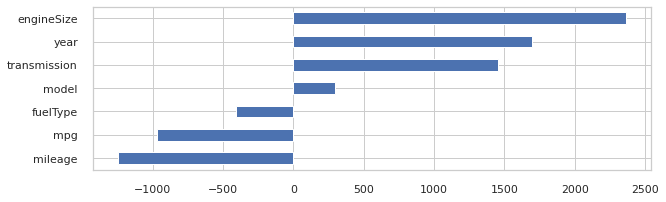

Ridge Regression, alpha=10.0
Validation MAE: $5,846
Validation R2: 0.196


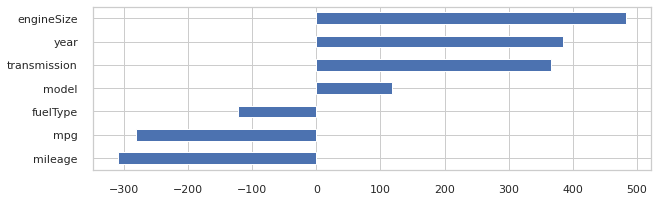

In [44]:
from sklearn.metrics import r2_score
from sklearn.linear_model import RidgeCV
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

for alpha in [0.001, 0.005, 0.01, 0.02, 0.03, 0.05, 0.07, 1.0, 10.0]:
        
    print(f'Ridge Regression, alpha={alpha}')

    # Ridge 모델 학습
    Ridge_model = Ridge(alpha=alpha, normalize=True)  
    Ridge_model.fit(X_train_scaled, y_train)
    y_pred = Ridge_model.predict(X_val_scaled)

    # MAE for test
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    
    print(f'Validation MAE: ${mae:,.0f}')
    print(f'Validation R2: {r2:,.3f}')
    
    # plot coefficients
    coefficients = pd.Series(Ridge_model.coef_, X_train.columns)
    plt.figure(figsize=(10,3))
    coefficients.sort_values().plot.barh()
    plt.show()


In [45]:
#Best Ridge Model
Ridge_model = Ridge(alpha=0.05, normalize=True)  
Ridge_model.fit(X_train_scaled, y_train)
y_pred_val_Ridge = Ridge_model.predict(X_val_scaled)

mse = mean_squared_error(y_val, y_pred_val_Ridge)
mae = mean_absolute_error(y_val, y_pred_val_Ridge)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred_val_Ridge)

display(pd.DataFrame([['MSE', mse],['MAE', mae],['RMSE', rmse],['R2', r2]], columns=['Metric', 'Score']))

,Metric,Score
0,MSE,19269524.7
1,MAE,3177.7
2,RMSE,4389.7
3,R2,0.7


#### 3-3. Random Forest

In [ ]:
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

pipe = make_pipeline(
    OrdinalEncoder(handle_missing="value"), 
    SimpleImputer(), 
    RandomForestClassifier(n_estimators=10, random_state=None, n_jobs=-1)
)

pipe.fit(X_train, y_train)
print('검증 정확도: ', pipe.score(X_val, y_val))

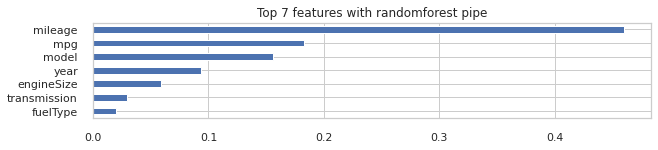

In [49]:
# Check feature importances

n = 7

rf = pipe.named_steps['randomforestclassifier']
importances_ord = pd.Series(rf.feature_importances_, X_train.columns)

plt.figure(figsize=(10,n/4))
plt.title(f'Top {n} features with randomforest pipe')
importances_ord.sort_values()[-n:].plot.barh();